# 1. Unsupervised learning - Clustering

<img src="https://cdn-images-1.medium.com/freeze/max/1000/0*OgoKv1eEw3kl4bWQ.jpg?q=20" />
<img src="https://lh3.googleusercontent.com/DS4BHTkXT_9FzxuOd67PNjJT-o87kdtvP42wq_JUzQz8oWhzOOxWKu0CAkTSzBzyLKrYNWAF8dAY6FUSgjLJFBBrMjHz_cdk9-i0QhAOnIdo8Nq3192BdGxlEUwRRpCzkp_iBiIK" width="600"/>

<img src="https://miro.medium.com/max/694/1*5RDVF1xW0LfXjoxZp6jI1Q.png" />

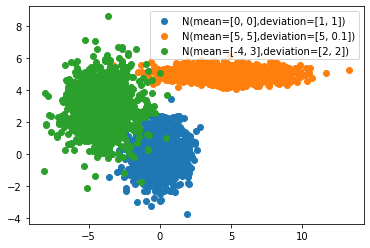

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian2D(mean,d):
    x = np.sqrt(d[0]) * np.random.randn(1000) + mean[0]
    y = np.sqrt(d[1]) * np.random.randn(1000) + mean[1]
    return [x,y]


gaussians = [
    [[0,0],[1,1]],
    [[5,5],[5,0.1]],
    [[-4,3],[2,2]]
]

for mean,deviation in gaussians:
    plt.scatter(*gaussian2D(mean,deviation))

plt.legend([f"N(mean={X[0]},deviation={X[1]})" for X in gaussians])



## Kmeans clustering

**Kmeans** is one of the most popular **clustering** algorithms. K-means stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster’s centroid than any other centroid. K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) choosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg" width="300"/>

**The Kmeans algorithm**
1.  Select `K` random starting cluster centroids
2.  Compute the distance between each observation and the clusters
3.  Reassign a cluster to each observation and then recompute the centroids
4.  Keep doing so until the labels stay constant and we no longer need to reassign


Voronoi diagram: 
- http://paperjs.org/examples/voronoi/
- http://www.raymondhill.net/voronoi/rhill-voronoi.html




## Other Clustering algorithms

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png" />

### Example: Bakery dataset  in sklearn

- https://github.com/boyander/datamad-1019/blob/master/w7-d4-unsupervised-pipeline/w7-d4-unsupervised-learning.ipynb

In [4]:
import pandas as pd
breadbasket = pd.read_csv('data/breadBasket.csv')
breadbasket.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [5]:
breadbasket['DateTime'] = pd.to_datetime(breadbasket.Date + ' ' + breadbasket.Time)


In [6]:
prods = breadbasket.Item.unique()
print(prods)
print(len(prods))

['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich'

In [7]:
breadbasket.Item.value_counts().head()


Coffee    5471
Bread     3325
Tea       1435
Cake      1025
Pastry     856
Name: Item, dtype: int64

In [8]:
groups = {
    "beverage":['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies'],
    "kids":["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit'],
    "snacks":['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars'],
    "bread":['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian'],
    "breakfast_pastry":['Muffin', 'Pastry', 'Medialuna', 'Scone'],
    "dessert":['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone'],
    "condiments":['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil'],
    "breakfast":['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami'],
    "lunch":['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
}

def chooseCat(prod):
    for groupName, groupItems in groups.items():
        if prod in groupItems:
            return groupName
    return "OTHER_FOOD"

breadbasket["category"] = breadbasket.Item.apply(chooseCat)
breadbasket = pd.get_dummies(breadbasket,columns=["category"],prefix="",prefix_sep="")


In [9]:
breadbasket 

,Date,Time,Transaction,Item,DateTime,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,1,0,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,1,0,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,1,0,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,0,1,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee,2017-04-09 14:32:58,0,1,0,0,0,0,0,0,0,0
21289,2017-04-09,14:32:58,9682,Tea,2017-04-09 14:32:58,0,1,0,0,0,0,0,0,0,0
21290,2017-04-09,14:57:06,9683,Coffee,2017-04-09 14:57:06,0,1,0,0,0,0,0,0,0,0
21291,2017-04-09,14:57:06,9683,Pastry,2017-04-09 14:57:06,0,0,0,0,1,0,0,0,0,0


In [10]:
bread_group1 = breadbasket.groupby(['Transaction','DateTime']).agg({'Item': lambda x: list(x)})
bread_group2 = breadbasket.groupby(['Transaction','DateTime']).sum()
cleandata = pd.concat([bread_group1,bread_group2],axis=1)
cleandata.head()

,,Item,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks
Transaction,DateTime,,,,,,,,,,,
1,2016-10-30 09:58:11,[Bread],0,0,1,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]",0,0,2,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]",0,1,0,0,0,1,1,0,0,0
4,2016-10-30 10:08:41,[Muffin],0,0,0,0,1,0,0,0,0,0
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]",0,1,1,0,1,0,0,0,0,0


In [11]:
cleandata.reset_index(level=['DateTime'], inplace=True)

In [12]:
cleandata['hour'] = cleandata.DateTime.dt.hour
cleandata['day'] = cleandata.DateTime.dt.dayofweek
display(cleandata.head())

X = cleandata.drop(columns=["DateTime","Item"])
original = X.copy()
display(X)

,DateTime,Item,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,[Bread],0,0,1,0,0,0,0,0,0,0,9,6
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]",0,0,2,0,0,0,0,0,0,0,10,6
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]",0,1,0,0,0,1,1,0,0,0,10,6
4,2016-10-30 10:08:41,[Muffin],0,0,0,0,1,0,0,0,0,0,10,6
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]",0,1,1,0,1,0,0,0,0,0,10,6


,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day
Transaction,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,9,6
2,0,0,2,0,0,0,0,0,0,0,10,6
3,0,1,0,0,0,1,1,0,0,0,10,6
4,0,0,0,0,1,0,0,0,0,0,10,6
5,0,1,1,0,1,0,0,0,0,0,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,1,0,0,0,0,0,0,0,14,6
9681,2,1,0,0,0,0,1,0,0,0,14,6
9682,1,2,0,0,1,0,0,0,0,0,14,6


In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)

labels = model.fit_predict(X)

cleandata["label"] = labels
cleandata.head()

,DateTime,Item,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day,label
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,[Bread],0,0,1,0,0,0,0,0,0,0,9,6,2
2,2016-10-30 10:05:34,"[Scandinavian, Scandinavian]",0,0,2,0,0,0,0,0,0,0,10,6,2
3,2016-10-30 10:07:57,"[Hot chocolate, Jam, Cookies]",0,1,0,0,0,1,1,0,0,0,10,6,2
4,2016-10-30 10:08:41,[Muffin],0,0,0,0,1,0,0,0,0,0,10,6,2
5,2016-10-30 10:13:03,"[Coffee, Pastry, Bread]",0,1,1,0,1,0,0,0,0,0,10,6,2


In [27]:
cleandata.label.value_counts()

1    3507
2    2565
3    1951
0    1508
Name: label, dtype: int64

In [28]:
import numpy as np
ct = pd.crosstab(cleandata.hour,[cleandata["label"]])
ct.loc[24] = np.zeros(len(ct.columns))

## Rearrange data as normal pastry hours 🚗
superdata = ct.iloc[1:].append(ct.iloc[0:1])
superdata

label,0,1,2,3
hour,,,,
7,0.0,6.0,0.0,10.0
8,0.0,232.0,0.0,143.0
9,0.0,635.0,0.0,372.0
10,0.0,824.0,0.0,443.0
11,0.0,962.0,0.0,483.0
12,0.0,847.0,0.0,500.0
13,425.0,0.0,738.0,0.0
14,400.0,0.0,730.0,0.0
15,359.0,0.0,565.0,0.0


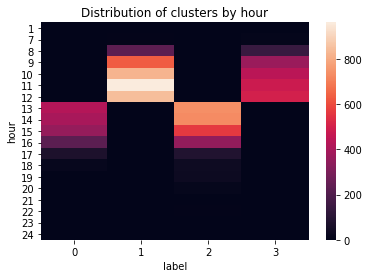

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.title("Distribution of clusters by hour")
sns.heatmap(ct)

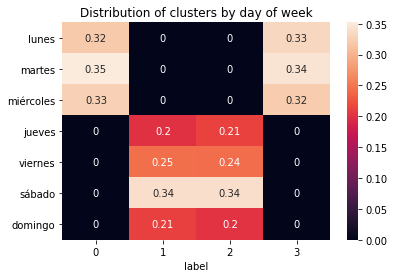

In [31]:
import calendar
import locale

calendar.setfirstweekday(calendar.SUNDAY)
locale.setlocale(locale.LC_ALL, 'es_ES')

plt.title("Distribution of clusters by day of week")
cleandata["wd"] = cleandata.DateTime.dt.day_name()
ct = pd.crosstab(cleandata.day,cleandata.label, normalize="columns")
ct.index = list(calendar.day_name)
sns.heatmap(ct, annot=True)

In [32]:
edata = cleandata.explode('Item')

a = edata.groupby(['label']).Item.value_counts()
b = a.to_frame("counts").reset_index().set_index("Item")
b.groupby('label').counts.nlargest(5)

label  Item    
0      Coffee       799
       Bread        443
       Tea          328
       Cake         234
       Sandwich     187
1      Coffee      2081
       Bread       1412
       Pastry       434
       Tea          392
       NONE         331
2      Coffee      1371
       Bread        798
       Tea          468
       Cake         400
       Sandwich     327
3      Coffee      1220
       Bread        672
       Pastry       267
       Tea          247
       NONE         151
Name: counts, dtype: int64

## Unsupervised learning cluster metrics
- **Sillouette score**: How dense the clusters are they and how well separated. CContrasts the average distance to elements in the same cluster with the average distance to elements in other clusters.
  - This score favors convex clusters, for many non convex datasets it will give an artificially low score
  - mean ratio of intra-cluster and nearest-cluster distance
  
<img src="https://image3.slideserve.com/6607494/limitations-of-k-means-non-convex-shapes-l.jpg" width="300"/>

**Note:** A convex polygon is a simple polygon (not self-intersecting) in which no line segment between two points on the boundary ever goes outside the polygon. Equivalently, it is a simple polygon whose interior is a convex set.[1] In a convex polygon, all interior angles are less than or equal to 180 degrees, while in a strictly convex polygon all interior angles are strictly less than 180 degrees.
  
- **Distortion**: Sum of squared distances of samples to their closest cluster center. `KMeans(3).fit(iris.data).intertia_`

**Note:** Smaller `distortion` means more dense clusters.

- **Calinski Harabaz**: The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion. `sklearn.metrics.calinski_harabasz_score`


- **T-SNE Plots**: Cluster visualization. Like PCA, embbed N dimensions into 2D space.
    - https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py
    - https://www.youtube.com/watch?v=NEaUSP4YerM
    
<img src="https://i.stack.imgur.com/OxEW5.png" width="400"/>



- **Elbow method**: Helps select the optimal number of clusters by fitting the model with a range of values for 𝐾

```python
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
```

In [33]:
print(f"Distortion= {model.inertia_}")

Distortion= 44352.32086997534


/usr/local/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.2

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x120980d00>,
                 k=None, metric='silhouette', model=None, timings=False)

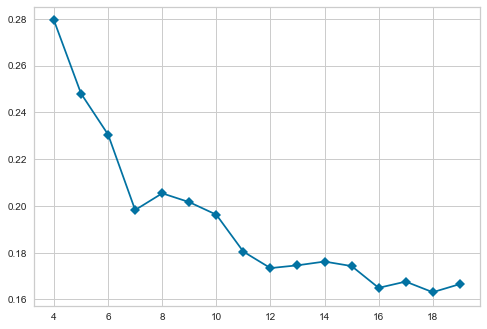

In [37]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20), metric="silhouette", timings=False)

visualizer.fit(X)        # Fit the data to the visualizer


/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x120fe7ac0>,
                 k=None, metric='silhouette', model=None, timings=False)

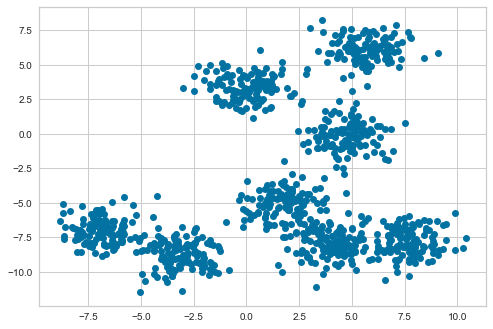

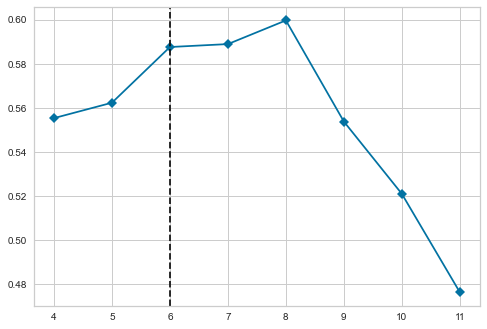

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=2, centers=8)

plt.plot(X[:,0],X[:,1],'o')

plt.figure()
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric="silhouette", timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer

### Example Bakery dataset  in Apache Spark

- https://github.com/boyander/datamad-1019/blob/master/w7-d5-spark-intro/spark-intro.ipynb

In [28]:
X = original.drop(columns=["wd","label"])
X.head()

,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day
Transaction,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,9,6
2,0,0,2,0,0,0,0,0,0,0,10,6
3,0,1,0,0,0,1,1,0,0,0,10,6
4,0,0,0,0,1,0,0,0,0,0,10,6
5,0,1,1,0,1,0,0,0,0,0,10,6


In [2]:
# Prepare a SparkContext
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [14]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import IntegerType
from pyspark.sql import SparkSession

spark = SparkSession(sc)

XX = spark.createDataFrame(X)

vecAssembler = VectorAssembler(inputCols=XX.columns, outputCol="Features")
new_df = vecAssembler.transform(XX)
X = new_df.select('Features')
X.head(5)

[Row(Features=SparseVector(12, {2: 1.0, 10: 9.0, 11: 6.0})),
 Row(Features=SparseVector(12, {2: 2.0, 10: 10.0, 11: 6.0})),
 Row(Features=SparseVector(12, {1: 1.0, 5: 1.0, 6: 1.0, 10: 10.0, 11: 6.0})),
 Row(Features=SparseVector(12, {4: 1.0, 10: 10.0, 11: 6.0})),
 Row(Features=SparseVector(12, {1: 1.0, 2: 1.0, 4: 1.0, 10: 10.0, 11: 6.0}))]

In [15]:
from pyspark.mllib.clustering import KMeans

num_clusters = 7
data = X.rdd.map(lambda x: x[0].toArray()) 
clusters = KMeans.train(data, num_clusters, maxIterations=15, initializationMode="random")

In [17]:
import pandas as pd

labeled_spark = original.reset_index()
labeled_spark["label_spark"] = clusters.predict(data).collect()

labeled_spark.head()

,Transaction,OTHER_FOOD,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,snacks,hour,day,label_spark
0,1,0,0,1,0,0,0,0,0,0,0,9,6,0
1,2,0,0,2,0,0,0,0,0,0,0,10,6,0
2,3,0,1,0,0,0,1,1,0,0,0,10,6,0
3,4,0,0,0,0,1,0,0,0,0,0,10,6,0
4,5,0,1,1,0,1,0,0,0,0,0,10,6,0


In [18]:
labeled_spark["label_spark"].value_counts()

0    1904
1    1496
4    1320
3    1314
6    1274
2    1140
5    1083
Name: label_spark, dtype: int64

# 2. Generative Models - Unsupervised learning

- **Generative GMM:** https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

Articles:
- https://openai.com/blog/generative-models/
- https://towardsdatascience.com/generative-deep-learning-lets-seek-how-ai-extending-not-replacing-creative-
process-fded15b0561b
- https://www.youtube.com/watch?v=G5JT16flZwM&feature=emb_logo
- https://pathmind.com/wiki/generative-adversarial-network-gan

Articles on autoencoders:
- https://medium.com/intuitive-deep-learning/autoencoders-neural-networks-for-unsupervised-learning-83af5f092f0b
- https://towardsdatascience.com/pca-vs-autoencoders-1ba08362f450